In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
data = np.load('img_data.npy')
data.shape

(390, 390, 1000)

In [3]:
labels = np.load('labels.npy')


In [4]:
#new_labels = np.concatenate((labels, np.transpose(labels)))
new_labels = np.zeros((1000, 2))
new_labels[0:500, 0] = 0
new_labels[0:500, 1] = 1
new_labels[500:1000, 0] = 1
new_labels[500:1000, 1] = 0

In [5]:
print(new_labels)

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [6]:
data.shape

(390, 390, 1000)

In [7]:
data = np.moveaxis(data, 2, 0)

In [8]:
data.shape

(1000, 390, 390)

In [9]:
X_train, x_test, y_train, y_test = train_test_split(data, new_labels, test_size = 0.10, random_state=42, shuffle=True)
X_train = X_train.reshape(X_train.shape[0], 390, 390, 1)
x_test = x_test.reshape(x_test.shape[0], 390, 390, 1)


In [10]:
y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [11]:
X_train_ds = tf.data.Dataset.from_tensor_slices(X_train)
x_test_ds = tf.data.Dataset.from_tensor_slices(x_test)
X_train_ds = X_train_ds.map(lambda x: tf.reshape(x, [390, 390, 1]))


y_train_ds = tf.data.Dataset.from_tensor_slices(y_train)
y_test_ds = tf.data.Dataset.from_tensor_slices(y_test)

train_dataset = tf.data.Dataset.zip((X_train_ds, y_train_ds))
test_dataset = tf.data.Dataset.zip((x_test_ds, y_test_ds))


In [12]:
X_train_ds

<DatasetV1Adapter shapes: (390, 390, 1), types: tf.float64>

In [13]:
train_dataset

<DatasetV1Adapter shapes: ((390, 390, 1), (2,)), types: (tf.float64, tf.float64)>

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), padding='same', activation='relu', input_shape=(390, 390, 1)),
    #tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(32, 32, 3)),

    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(128, (5,5), padding='same', activation='relu'),

    tf.keras.layers.MaxPool2D(padding='same'),

    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(256, (5,5), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(256, (5,5), padding='same', activation='relu'),
    
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(512, (5,5), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(512, (5,5), padding='same', activation='relu'),
    
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    tf.keras.layers.Conv2D(512, (3,3), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(512, (5,5), padding='same', activation='relu'),
    #tf.keras.layers.Conv2D(512, (5,5), padding='same', activation='relu'),
        
    tf.keras.layers.MaxPool2D(padding='same'),
    
    tf.keras.layers.Flatten(),
    #tf.keras.layers.Dense(4096, activation='relu'),
    #tf.keras.layers.Dense(4096, activation='relu'),
    #tf.keras.layers.Dense(1000, activation='relu'),

    tf.keras.layers.Dense(2, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
model.compile(optimizer=tf.train.AdamOptimizer(0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 390, 390, 8)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 195, 195, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 195, 195, 128)     9344      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 98, 98, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 98, 98, 256)       295168    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 256)       590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 49, 49, 256)       0         
__________

In [17]:
model.fit(X_train, y_train, epochs= 1, validation_data = (x_test, y_test),
          verbose=1)

Train on 900 samples, validate on 100 samples
900/900 [==============================] - 644s 715ms/sample - loss: 0.7356 - acc: 0.5122 - val_loss: 0.6929 - val_acc: 0.4800


In [17]:
X_train.shape

(900, 390, 390, 1)

array([0., 1.])

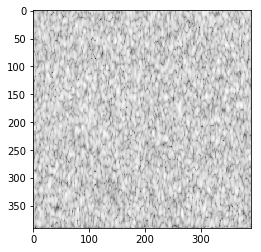

In [18]:
image_num = 35;
test_img = np.squeeze(X_train[image_num, :, :])
plt.imshow(test_img, cmap='gray')
y_train[image_num]

In [19]:
dec_img = 

SyntaxError: invalid syntax (<ipython-input-19-bea839a640e9>, line 1)